# []

In [6]:
# inbuilt 
import os
import sys
import math

# most common
import numpy as np
import matplotlib.pyplot as plt

# pytorch
import torch as tt
import torch.nn as nn
import torch.functional as ff
import torch.distributions as dd
import torch.utils.data as ud

# custom
import known
import known.ktorch as kt

print(f'{sys.version=}\n{np.__version__=}\n{tt.__version__=}\n{known.__version__=}')

sys.version='3.10.2 (tags/v3.10.2:a58ebcc, Jan 17 2022, 14:12:15) [MSC v.1929 64 bit (AMD64)]'
np.__version__='1.24.1'
tt.__version__='1.13.1+cpu'
known.__version__='0.0.1'


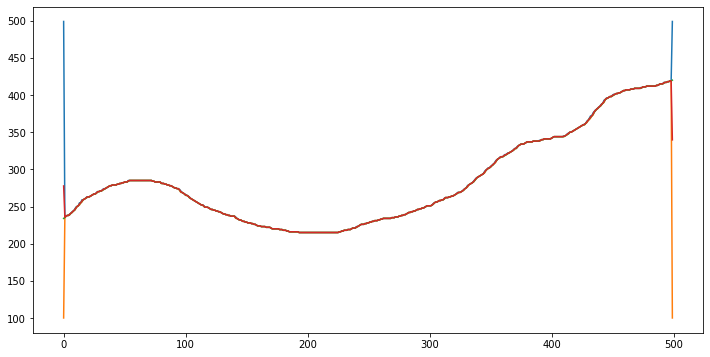

In [7]:
plt.figure(figsize=(12,6))
for px in [ 'first', 'last', 'mid', 'mean' ]:
    a = known.basic.graphfromimage('g1.png', pixel_choice=px)
    plt.plot(a)
plt.show()

In [ ]:
a = known.basic.graphfromimage('g1.png', pixel_choice='last')
plt.plot(a), a.shape, a.ndim, a.dtype#, a

In [ ]:
a = known.basic.graphfromimage('g1.png', pixel_choice='first')
plt.plot(a), a.shape, a.ndim, a.dtype#, a

In [ ]:
a = known.basic.graphfromimage('g1.png', pixel_choice='mid')
plt.plot(a), a.shape, a.ndim, a.dtype#, a

In [ ]:
a = known.basic.graphfromimage('g1.png', pixel_choice='mean')
plt.plot(a), a.shape, a.ndim, a.dtype#, a